In [8]:
import numpy as np
import pandas as pd 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Cleaning

In [10]:
# read data by using pd.read_excel
df = pd.read_excel('uncleaned bike sales data.xlsx')

# first five rows 
df.head()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


In [11]:
# remove spaces
df.columns = df.columns.str.strip()
df.columns

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', 'Unit_Cost',
       'Unit_Price', 'Profit', 'Cost', 'Revenue'],
      dtype='object')

### Summary of unclean bike sales dataframe
- The dataset consists of sales order information for various products across different countries and states. The sales orders span the month of December 2021. Customers of different age groups and genders have placed orders for mountain bikes in the "Bikes" product category. The order quantities vary, with some orders for multiple units of the same product. 

- The dataset includes details such as the unit cost, unit price, profit, cost, and revenue for each sales order. It is evident that there are differences in pricing and profitability across the orders. For example, the profit generated from each order varies, with some orders being more profitable than others.

- The dataset provides a snapshot of sales transactions, customer demographics, and product performance. Further analysis could involve examining trends in sales, profitability by product category, and customer behavior based on age group and gender. Additionally, exploring the impact of location (country and state) on sales performance could provide valuable insights into market dynamics.

### Columns Descriptions
- **Sales_Order**: A unique identifier assigned to each sales order for tracking and reference purposes.
- **Date**: The date when the sales order was placed, providing a timestamp for the transaction.
- **Day**: The specific day of the month (1-31) on which the sales order was processed.
- **Month**: The month in which the sales order was placed, indicating the time period of the transaction.
- **Year**: The year in which the sales order was made, providing the annual context of the transaction.
- **Customer_Age**: The age of the customer who made the purchase, helping to understand the demographic profile of buyers.
- **Age_Group**: The categorized age group to which the customer belongs, offering insights into customer segmentation based on age.
- **Customer_Gender**: The gender of the customer, providing demographic information about the buyers.
- **Country**: The country where the sales order originated, highlighting the geographic location of the transaction.
- **State**: The specific state or region within the country where the sales order was placed, providing further geographical details.
- **Product_Category**: The broad category to which the product belongs, classifying it into a specific group.
- **Sub_Category**: The sub-category of the product, offering more detailed classification within the main product category.
- **Product_Description**: A descriptive text providing details about the specific product ordered.
- **Order_Quantity**: The number of units of the product included in the sales order, indicating the quantity purchased.
- **Unit_Cost**: The cost of producing or acquiring each unit of the product, influencing the profitability of the transaction.
- **Unit_Price**: The price at which each unit of the product is sold, determining the revenue generated per unit.
- **Profit**: The total profit earned from the sales order, calculated as the difference between revenue and cost.
- **Cost**: The total cost incurred for the products included in the sales order, influencing the overall profitability.
- **Revenue**: The total revenue generated from the sales order, representing the total amount earned from selling the products.


##### Issues with the data

`1. Dirty Data(Quality Related):`
- Row 10: There is a missing value in the "Day" column for this particular row. `Completeness`
- 1 Duplicated row found in row number 7 `Completeness`
- Row 15: A missing value is present in the "Age_Group" column for this specific row.`Completeness`
- Customer_Gender Column: The values "F" and "M" in the "Customer_Gender" column should be updated to "Female" and "Male," respectively, for better clarity and understanding.`Consistency`
- State Column: In rows 10, 54, and 56, the state value "Nordrhein-Westfalen" (German) needs to be converted to its English equivalent, "North Rhine-Westphalia" to ensure consistency and standardization in the state names across the dataset.`Consistency`
- In rows 31, 60, 64, and 82 of the "State" column, where the value is "Seine (Paris)" it should be converted to "Paris" for consistency and clarity in the state names.`Consistency`
- Row 21: There is a missing value in the "Product_Description" column for this particular row.`Completeness`
- Row 22: There is a missing value in the "Order_Quantity" column `Completeness`
- In row 5,23 of the dataset, the value in the "Unit_Cost" column is 0, which does not make sense as unit cost should never be zero.`Accuracy`
- In row 9 of the dataset, the value in the "Unit_Price" column is 0, which does not make sense as unit cost should never be zero.`Accuracy`
- In row 5 of the dataset, the value in the "Cost" column is 0, which does not make sense as unit cost should never be zero.`Accuracy`
- In row 5,23 of the dataset, the value in the "Revenue" column is 0, which does not make sense as unit cost should never be zero.`Accuracy`
- The 'Day' column datatype needs to be converted to an integer to represent the day of the month accurately.`Validity`

- The `'Order_Quantity', 'Size_Centimeter'` columns datatype should be converted to an integer to reflect the numerical quantity of products ordered.`Validity`

- The 'Month' column contains categorical data representing the months of the year and should be converted to a categorical data type for better handling and analysis.`Validity`

- The 'Product_Category' column holds categorical data representing different product categories and should be converted to a categorical data type for efficient data management.`Validity`

- The 'Sub_Category' column contains categorical data representing sub-categories of products and should be converted to a categorical data type to enhance data organization and analysis.`Validity`
- In 'Color' column,Each color value in the Color column is currently associated with a comma, and these commas need to be removed from all color values.`Consistency`
- In 'Age_Range' column,Each value in the column is currently associated with a right prenthesis, and these parenthesis need to be remove from all age range. `Consistency`
- The 'Age_Range', 'Model_Name', 'Color', and 'Size_Centimeter' columns should have a categorical data type, but they are incorrectly assigned as an object data type.`Validity`
- To correct the misspelling of "Decmber" in row 18 of the month column, it should be written as "December". `Consistency`

- The issue in the "Age_Group" column involves inconsistency in the formatting of the values. While most "Adults" values have spaces after them, one "Adults" value does not follow this pattern.`Consistency`

`2. Missy Data(Structure Related):`
- The Age_Group column includes both age group and age range information and needs to be separated into two distinct columns.
- The Product_Description column includes both bike_model, color, and size_centimer and that needs to be separated into two distinct columns.

#### Data Cleaning Order
- Quality - Completeness
- Missy
- Quality - Validity
- Quality - Accuracy
- Quality - Consistency

- Completeness

In [12]:
# copy dataframe
tem_df = df.copy()

In [13]:
# The Day column was filled with the day of the month on which the sales occurred, based on the Date column.
tem_df.loc[10, 'Day'] = tem_df.loc[10, 'Date'].day

In [14]:
# I categorized customers based on their age and used their age to fill the missing value in the 'age_group' column.
tem_df.loc[15, 'Age_Group'] = 'Adults (35-64)'


In [15]:
# fill nan vlaue of product_description column
# I filtered customers from the USA and determined the most common type, color, and size of bikes they prefer to purchase. I then used these most frequent values to fill in missing data for a customer
tem_df.loc[21, 'Product_Description'] = 'Mountain-200 Black, 46'

In [16]:
# fill nan value of order-quantity
# The missing value in the 'order_quantity' column is determined to be 1 unit based on the information provided in the 'State', 'Product_Description', 'Unit_Cost', 'Unit_Price', and 'Profit' columns.
tem_df.loc[tem_df['Order_Quantity'].isna(), 'Order_Quantity'] = 1

- Missy

In [17]:
# split by space and extract age_range 
tem_df['Age_Range'] = tem_df['Age_Group'].str.split('(').str.get(1)

# split this column to extract only age_group 
tem_df['Age_Group'] = df['Age_Group'].str.split('(').str.get(0)


In [18]:
# Splitting the 'Product_Description' column to create new columns
# This allows for better understanding and analysis of the data
tem_df[['Model_Name','Color','Size_Centimeter']] = tem_df['Product_Description'].str.split(' ', expand=True)

In [19]:
# set optiong for see all column of dataframe
pd.set_option('display.max.columns', None)

- Validity

In [20]:
# change day column datatype
tem_df['Day'] = tem_df['Day'].astype(int)

In [21]:
# change Order_Quantity column dtype
tem_df['Order_Quantity'] = tem_df['Order_Quantity'].astype(int)

In [22]:
columns_to_convert = ['Month','Product_Category','Sub_Category' ,'Age_Range', 'Model_Name', 'Color']

# Convert columns to categorical data type
tem_df[columns_to_convert] = tem_df[columns_to_convert].astype('category')

In [23]:
# change Size_Centimeter column dtype
tem_df['Size_Centimeter'] = tem_df['Size_Centimeter'].astype(int)

- Accuracy

In [24]:
# In row 5, the Unit_Cost might be 1252. With the help of the Revenue and Profit columns,
# we can easily calculate the Unit_Cost (Revenue - Profit). then divide by Order_Quantity

tem_df.loc[4, 'Unit_Cost'] = (tem_df.loc[4, 'Revenue'] - tem_df.loc[4, 'Profit'])/tem_df.loc[4, 'Order_Quantity']

In [25]:
# in row 9, Unit_Price and Revenue column values are zero which need to replace with appropriate way
# Revenue = Cost + Profit
# Unit_Price = Revenue / Order_Quantity

# revenue
tem_df.loc[8, 'Revenue'] = tem_df.loc[8, 'Cost'] + tem_df.loc[8, 'Profit']

# unit_price
tem_df.loc[8, 'Unit_Price'] = tem_df.loc[8, 'Revenue']/tem_df.loc[8, 'Order_Quantity']

In [26]:
# in row 5 cost price i fill this value by using this formula
# cost = Order_Quantity * Unit_Cost
tem_df.loc[4, 'Cost'] = tem_df.loc[4, 'Unit_Cost'] * tem_df.loc[4, 'Order_Quantity']

In [27]:
# in row 23 Cost and Revnue column is zero and zero need to convert 
# cost = order_quantity * unit_cost
# reveue = order_quantity * unit_price

#cost
tem_df.loc[22, 'Cost'] = tem_df.loc[22, 'Order_Quantity'] * tem_df.loc[22, 'Unit_Cost']
# revenue
tem_df.loc[22, 'Revenue'] = tem_df.loc[22, 'Order_Quantity'] * tem_df.loc[22, 'Unit_Price']

- Consistency

In [28]:
# Gender dictionary 
gender = {'F': 'Female', 'M':'Male'}

#Mapping the 'Customer_Gender' values to their corresponding gender descriptions using the gender dictionary
tem_df['Customer_Gender'] = tem_df['Customer_Gender'].map(gender)

# convert dtype
tem_df['Customer_Gender'] = tem_df['Customer_Gender'].astype('category')

In [29]:
# change "Nordrhein-Westfalen"(German) to English "North Rhine-Westphalia"
tem_df.loc[tem_df['State'] == "Nordrhein-Westfalen", 'State'] = "North Rhine-Westphalia"

In [30]:
# convert this "Seine (Paris)" to Paris
tem_df.loc[tem_df['State'] == "Seine (Paris)", 'State'] = 'Paris'

In [31]:
# remove ',' from color column
tem_df['Color'] = tem_df['Color'].str.replace(',','')

# convert into categorical dtype
tem_df['Color'] = tem_df['Color'].astype('category')

In [32]:
# remove right prenthesis 
tem_df['Age_Range'] = tem_df['Age_Range'].str.replace(')','').astype('category')

In [33]:
# remove speces from Adults 
tem_df['Age_Group'] = tem_df['Age_Group'].str.strip()

# I categorized customers based on their age and used their age to fill the missing value in the 'age_group' column.
tem_df.loc[15, 'Age_Group'] = 'Adults'

In [34]:
# correct month name 
tem_df.loc[tem_df['Month'] == 'Decmber', 'Month'] = 'December'

# after remove this from category
tem_df['Month'] = tem_df['Month'].cat.remove_unused_categories()

In [35]:
# drop row number 7
tem_df.drop([7], inplace=True)

# Exploratory Data Analysis

#### Columns Types
`Numerical:` Day, Customer_Age, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue

`Categorical:` Month, Customer_Gender, Product_Category, Sub_Category, Age_Range, Model_Name, Color, Size_Centimeter

`Mixed:`Age_Group, Country, State, Product_Description, Date, Sales_Order #

In [36]:
# frist five rows
tem_df.head()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_Range,Model_Name,Color,Size_Centimeter
0,261695,2021-12-01,1,December,2021,39,Adults,Female,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4,1252,2295,4172,5008,9180,35-64,Mountain-200,Black,46
1,261695,2021-12-01,1,December,2021,44,Adults,Male,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,1054,1266,2320,35-64,Mountain-200,Silver,42
2,261697,2021-12-02,2,December,2021,37,Adults,Male,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2,420,769,698,840,1538,35-64,Mountain-400-W,Silver,46
3,261698,2021-12-02,2,December,2021,31,Young Adults,Female,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1,420,769,349,420,769,25-34,Mountain-400-W,Silver,42
4,261699,2021-12-03,3,December,2021,37,Adults,Female,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590,35-64,Mountain-200,Black,46


In [37]:
# information of dataframe
tem_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 88
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order #        88 non-null     int64         
 1   Date                 88 non-null     datetime64[ns]
 2   Day                  88 non-null     int32         
 3   Month                88 non-null     category      
 4   Year                 88 non-null     int64         
 5   Customer_Age         88 non-null     int64         
 6   Age_Group            88 non-null     object        
 7   Customer_Gender      88 non-null     category      
 8   Country              88 non-null     object        
 9   State                88 non-null     object        
 10  Product_Category     88 non-null     category      
 11  Sub_Category         88 non-null     category      
 12  Product_Description  88 non-null     object        
 13  Order_Quantity       88 non-null     int32

In [38]:
# no of missing values
tem_df.isna().sum()

Sales_Order #          0
Date                   0
Day                    0
Month                  0
Year                   0
Customer_Age           0
Age_Group              0
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    0
Order_Quantity         0
Unit_Cost              0
Unit_Price             0
Profit                 0
Cost                   0
Revenue                0
Age_Range              0
Model_Name             0
Color                  0
Size_Centimeter        0
dtype: int64

In [39]:
# number of duplicated rows
tem_df.duplicated().sum()

0

In [40]:
# descriptive stats for numerical columns
tem_df.describe()

,Sales_Order #,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Size_Centimeter
count,88.000000,88,88.000000,88.0,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,261738.488636,2021-12-13 13:21:49.090909184,13.556818,2021.0,34.170455,2.125000,1064.204545,1945.659091,1858.045455,2246.863636,4104.909091,41.886364
min,261695.000000,2021-12-01 00:00:00,1.000000,2021.0,17.000000,1.000000,295.000000,540.000000,245.000000,295.000000,540.000000,38.000000
25%,261716.750000,2021-12-08 18:00:00,8.750000,2021.0,29.750000,1.000000,1044.000000,1913.500000,1043.000000,1252.000000,2295.000000,38.000000
50%,261738.500000,2021-12-13 12:00:00,13.500000,2021.0,35.000000,2.000000,1252.000000,2295.000000,1054.000000,1266.000000,2320.000000,42.000000
75%,261760.250000,2021-12-19 00:00:00,19.000000,2021.0,38.000000,3.000000,1266.000000,2320.000000,2997.750000,3756.000000,6783.750000,46.000000
max,261782.000000,2021-12-24 00:00:00,24.000000,2021.0,63.000000,4.000000,1912.000000,3400.000000,5908.000000,7592.000000,13500.000000,52.000000
std,25.566678,NaN,6.356928,0.0,8.131423,1.239322,428.250361,776.031192,1399.697709,1716.810188,3115.834755,3.475470


# Univariate Analysis

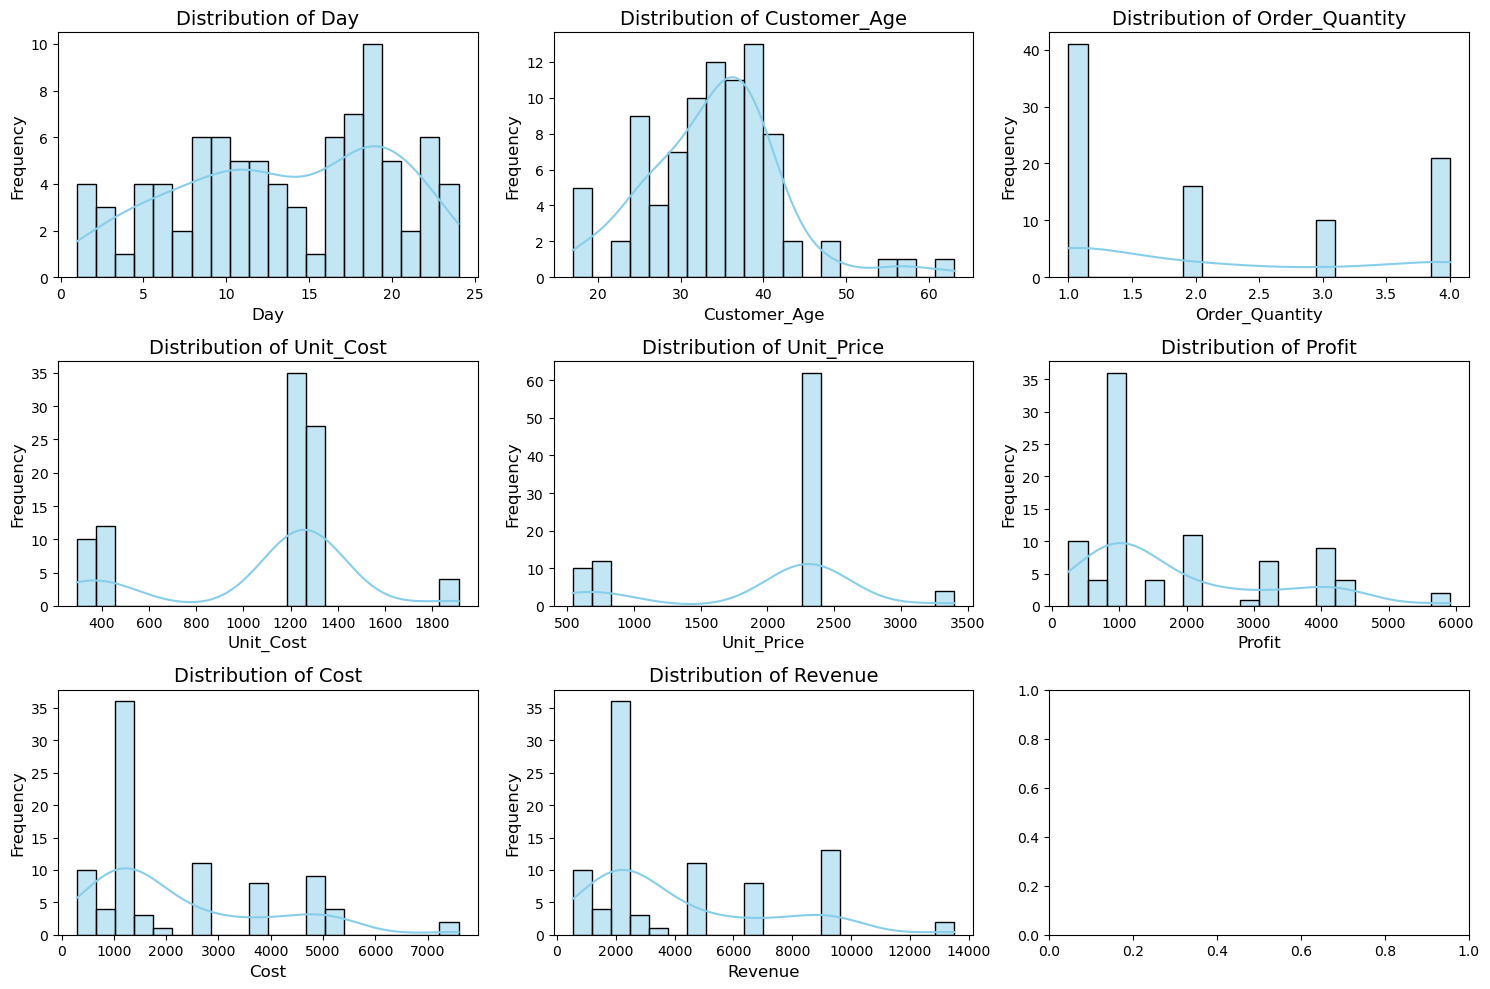

In [41]:
numerical_cols = ['Day', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']

# Setting up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Suppressing warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)


# Flatten the axes for easy iteration
axes = axes.flatten()

# Plotting histograms for each numerical column
for i, column in enumerate(numerical_cols):
    sns.histplot(data=tem_df, x=column, ax=axes[i], bins=20, color='skyblue', edgecolor='black', kde=True)
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(False)

# Adjust layout
plt.tight_layout()
plt.show()


<center><strong>Numerical Cclumns</strong></center>


##### Day
`conclusions:`  
- A significant portion of sales occurred between Day 15 and Day 20, with Day 19 recording the highest sales volume among these days.
- The skewness value of -0.259 indicates a slight left skew in the distribution of the data. While the majority of the data points are clustered towards higher values, there are still some lower values present.

##### Customer_Age
`conclusions:`
- The customer age data ranges from 17 to 63 years, with a mean age of approximately 34.17 years. The distribution appears slightly right-skewed, with common ages clustering around the late 20s to early 40s. However, outliers such as customers aged 63 and 56 indicate some variability in the dataset.

##### Order_Quantity
`conclusions:` 
-  The majority of customers purchase single units, However, there is a notable subset of customers who tend to order four units at a time. This insight can inform inventory management and marketing strategies tailored to different purchasing behaviors. 

##### Unit_Cost
`conclusions:`
- The unit costs for products in the dataset exhibit variability, ranging from 295 to 1912. Despite this variability, the majority of unit costs center around the median value of 1252. This suggests that while there is diversity in pricing, there is a tendency towards a central price point. Additionally, fluctuations in unit costs influenced by factors such as order quantity.


##### Unit_Price
`conclusions:
- The unit prices for products in the dataset exhibit a wide range, from 540 to 3400. Despite this variability, the majority of unit prices are centered around the median value of 2295. This suggests a tendency towards a central price point, with some products priced higher or lower. The variability in unit prices influenced by Order Unit.`


##### Profit
`conclusions:`

- The profit column values, ranging from 245 to 5908, reflect the outcomes of transactions influenced by both cost and revenue. Despite variability, the median profit remains consistent at 1054, indicating a central tendency. This suggests that profit margins are influenced by the balance between costs and revenues, highlighting the importance of effective cost management and revenue generation strategies in determining overall profitability.


##### Cost
`conclusions:`
- The cost column values range from 295 to 7592, with a median cost of 1266. This cost is influenced by the unit cost selected by the bike company, reflecting a wide variability in costs across transactions. Effective management of unit costs is crucial in determining overall profitability, as higher unit costs may impact profit margins negatively.


##### Revenue
`conclusions:`
- The revenue column values range from 540 to 13500, with a median revenue of 2320. Revenue is influenced by the unit price and the quantity sold, reflecting a wide variability in revenue across transactions.

In [42]:
def val_count(df, column):
    return df[column].value_counts()

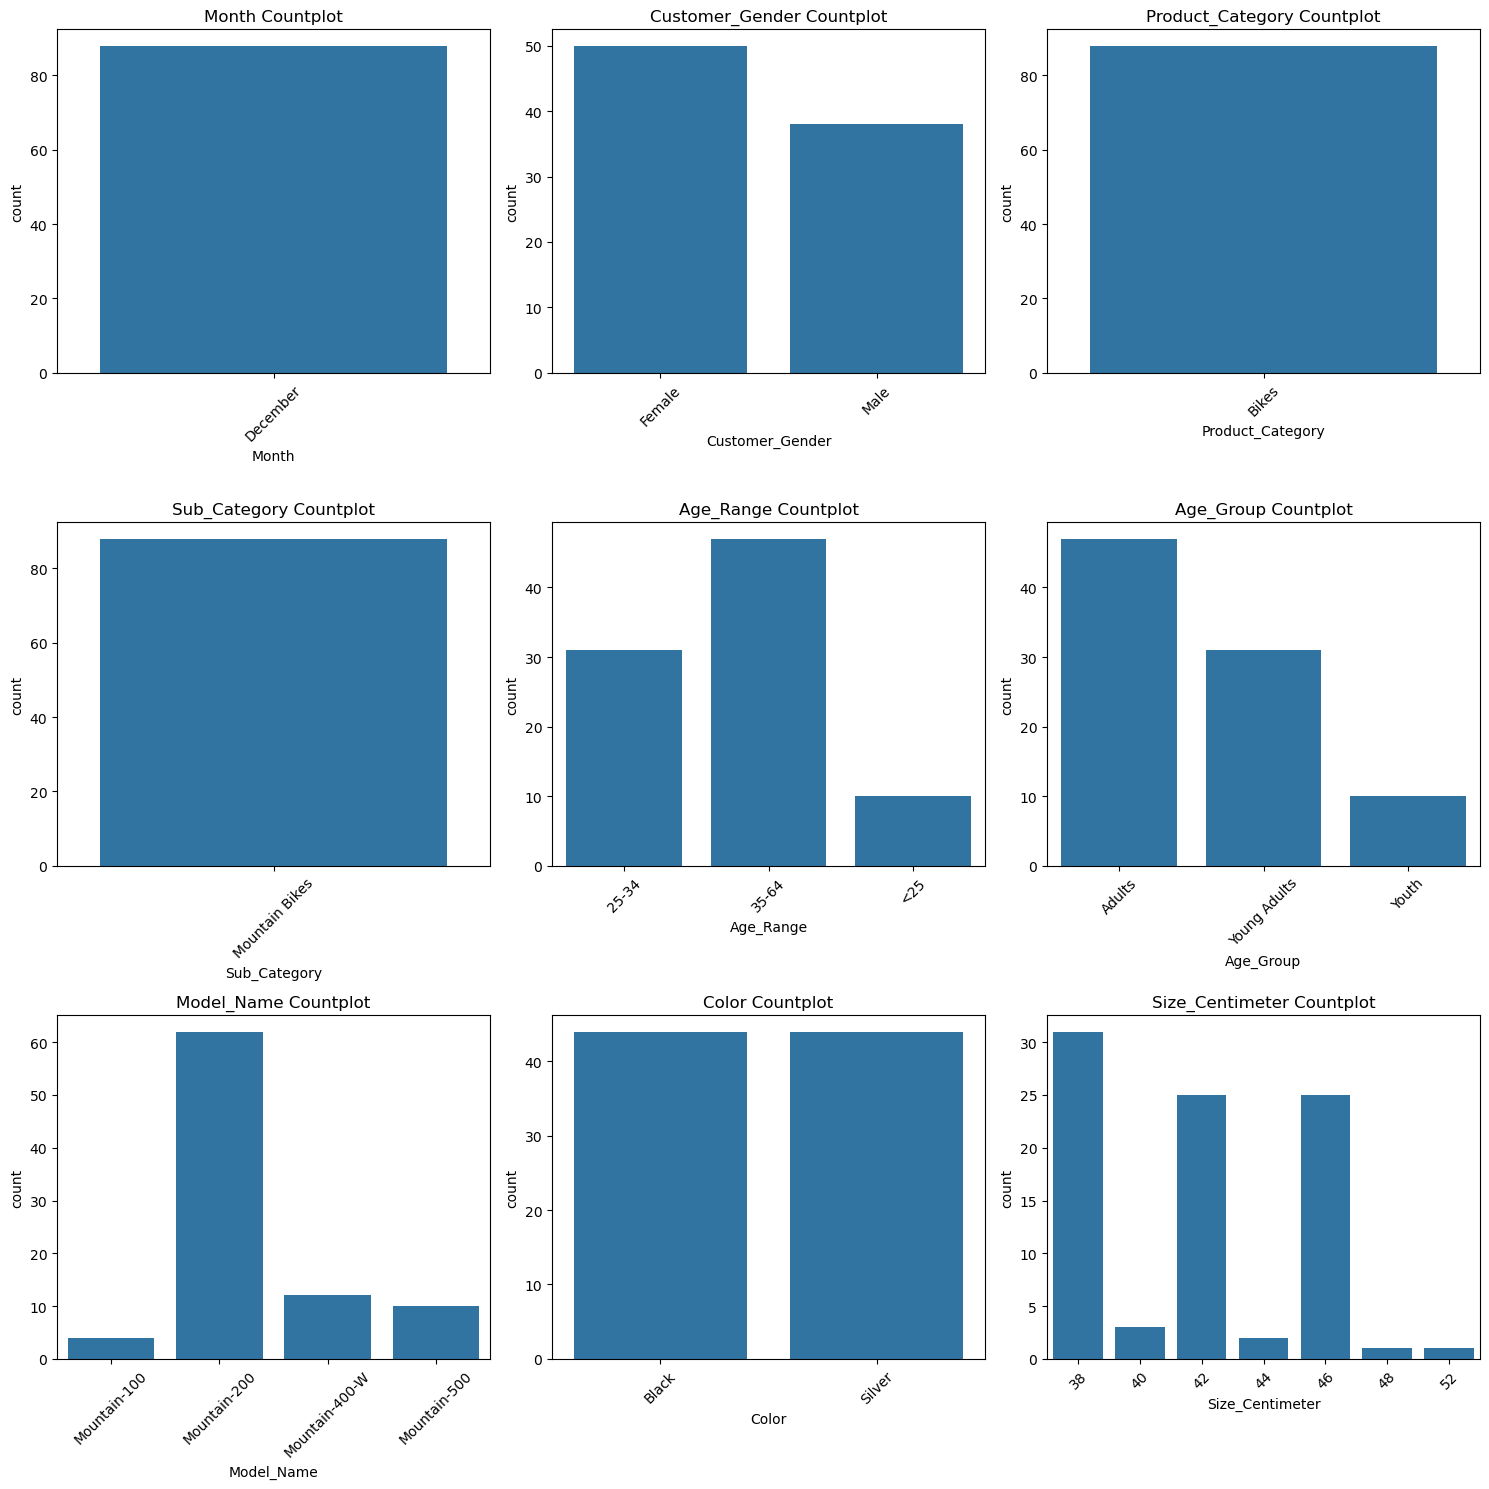

In [43]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Categorical columns
cat_col = ['Month', 'Customer_Gender', 'Product_Category', 'Sub_Category', 'Age_Range', 'Age_Group','Model_Name', 'Color', 'Size_Centimeter']

# Calculate the number of rows and columns for the subplot grid
num_cols = 3
num_rows = (len(cat_col) - 1) // num_cols + 1

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each categorical column and create a countplot
for i, col in enumerate(cat_col):
    sns.countplot(x=col, data=tem_df, ax=axes[i])
    axes[i].set_title(f'{col} Countplot')
    axes[i].tick_params(axis='x', rotation=45)
# Adjust layout to prevent overlap of titles
plt.tight_layout()
plt.show()

<center><strong>Categorical Columns</strong></center>

##### Month:
`conclusions:`
- Given that only December data is presented in the dataset.

##### Customer_Gender:
`conclusions:`
- The data shows a slight predominance of female customers over male customers.

##### Product_Category:
`conclusions:`
- The dataset exclusively features bikes as the product category, highlighting a focused product offering within the dataset.

##### Sub_Category:
`conclusions:`
- The dominance of Mountain Bikes in the Sub_Category further underscores a specialized product lineup.


##### Age_Range:
`conclusions:`
- Customers aged 35-64 constitute the largest demographic, followed by those aged 25-34 and <25, showcasing a broad customer base with a notable presence of middle-aged buyers.

##### Age_Group:
`conclusions:`
- Adults represent the majority of buyers, followed by Young Adults and Youth, emphasizing the importance of targeting adult demographics in marketing strategies.

##### Model_Name:
`conclusions:`
- The Mountain-200 model leads in popularity, suggesting a preference for this particular model among customers.

##### Color:
`conclusions:`
- Black and Silver are equally popular color choices, indicating a balanced preference for these two options.

##### Size_Centimeter:
`conclusions:`
- The most common size is 38 centimeters, with 46, 42, and 40 centimeters also seeing significant sales, highlighting the importance of offering a range of sizes to accommodate diverse customer needs.


#### State
`conclusions:`
- California had the highest number of bike sales with a total of 20, followed by New South Wales with 14 sales. This suggests that these two regions are popular for bike purchases.

In [44]:
# frequency of state column
val_count(tem_df, 'State')

State
California                20
New South Wales           14
England                    9
Washington                 8
British Columbia           6
Victoria                   6
Queensland                 6
Oregon                     4
Paris                      4
North Rhine-Westphalia     3
Hessen                     2
Hamburg                    1
Seine et Marne             1
Seine Saint Denis          1
Nord                       1
South Australia            1
Somme                      1
Name: count, dtype: int64

<Axes: xlabel='State'>

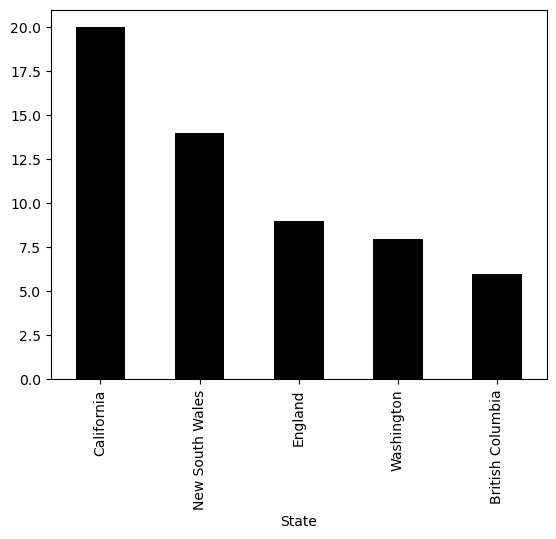

In [45]:
# top five state for selling bike 
val_count(tem_df, 'State').head().plot(kind='bar',color='black')

#### Country
`conclusions:`
- The top two countries for bike sales in the dataset are the United States with 30 sales and Australia with 27 sales, indicating a strong market for bikes in these regions.

In [46]:
# frequency
val_count(tem_df, 'Country')

Country
United States     29
Australia         27
United Kingdom     9
France             8
Germany            6
Canada             6
 United States     1
United  States     1
United States      1
Name: count, dtype: int64

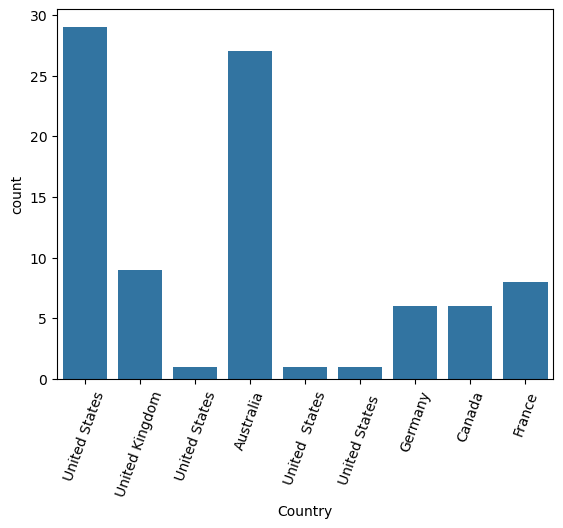

In [47]:
sns.countplot(data=tem_df, x='Country')
plt.xticks(rotation=70)
plt.show()

# Bivariate Analysis

### Numerical to Numerical

In [48]:
num_cols = tem_df[['Day','Customer_Age', 'Order_Quantity','Unit_Cost', 'Unit_Price','Profit','Cost','Revenue']]
num_cols.columns.tolist()

['Day',
 'Customer_Age',
 'Order_Quantity',
 'Unit_Cost',
 'Unit_Price',
 'Profit',
 'Cost',
 'Revenue']

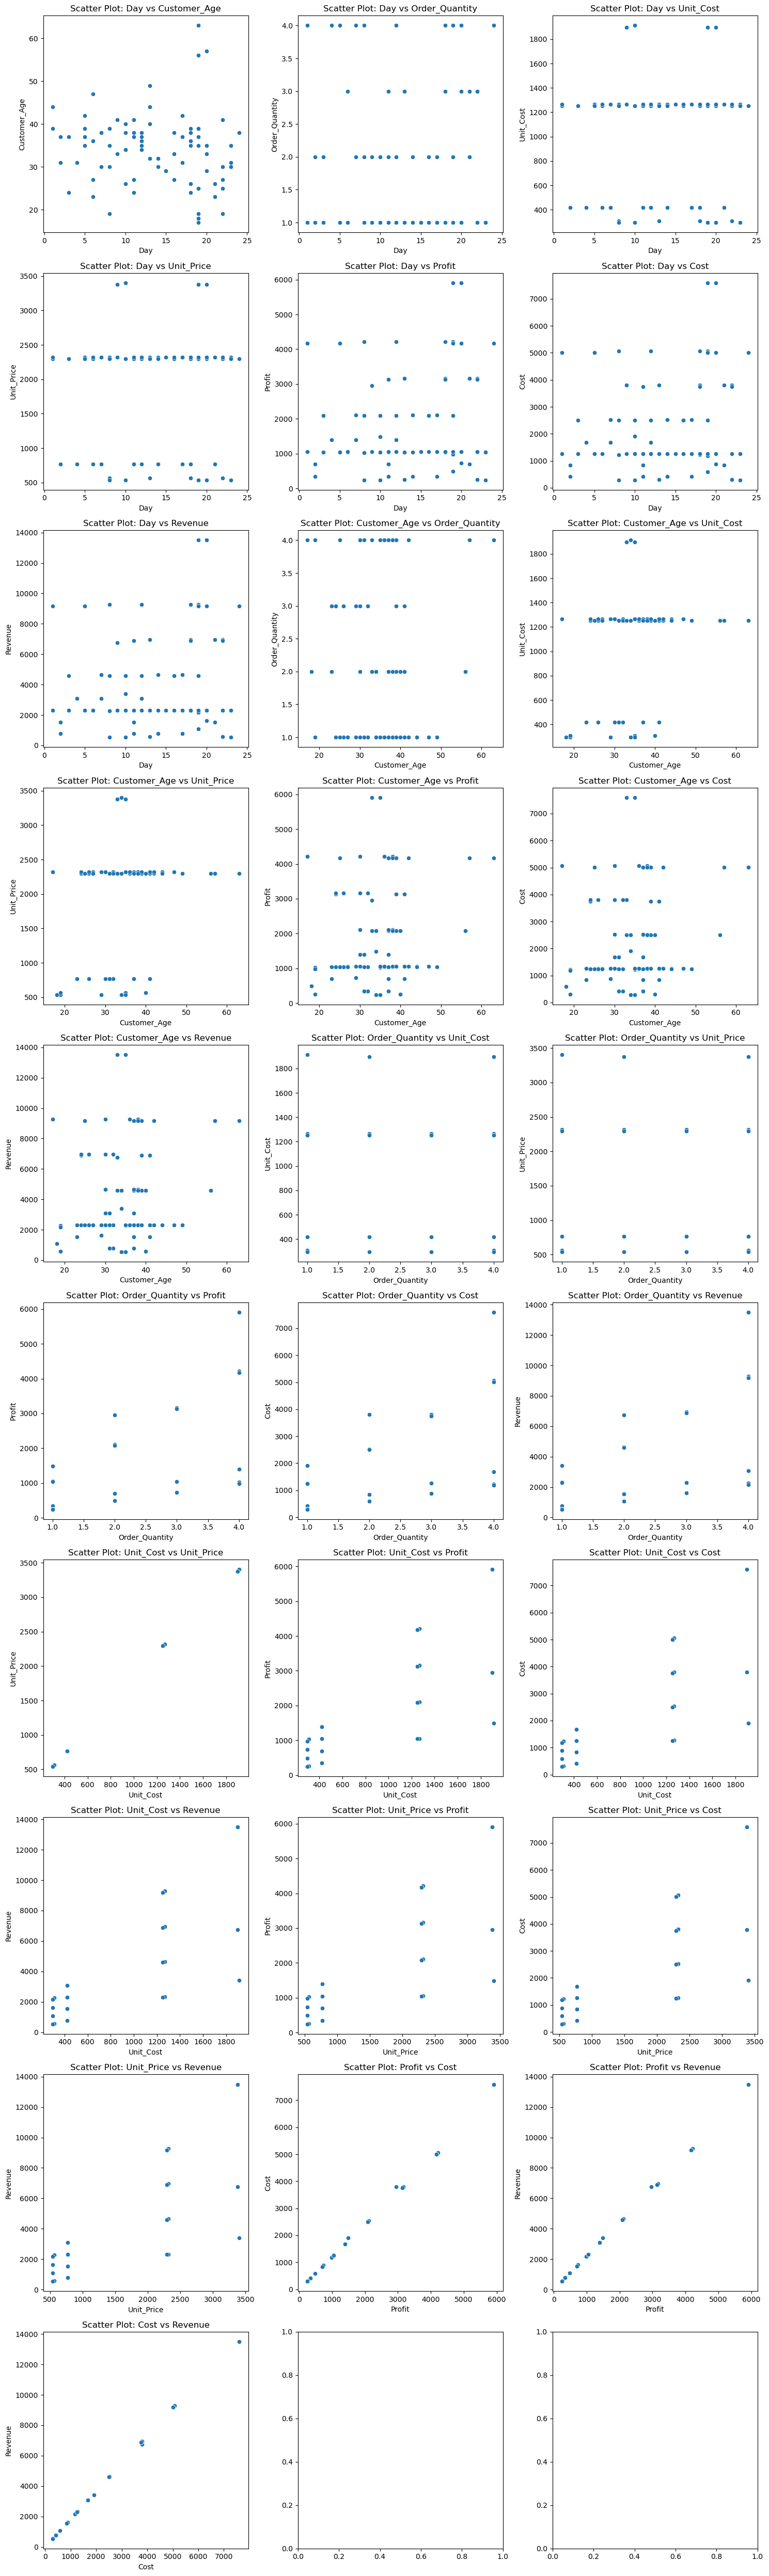

In [49]:
unique_column_combinations = [
    ['Day', 'Customer_Age'],['Day', 'Order_Quantity'],['Day', 'Unit_Cost'],
    ['Day', 'Unit_Price'],['Day', 'Profit'],['Day', 'Cost'],['Day', 'Revenue'],
    ['Customer_Age', 'Order_Quantity'],['Customer_Age', 'Unit_Cost'],['Customer_Age', 'Unit_Price'],
    ['Customer_Age', 'Profit'],['Customer_Age', 'Cost'],['Customer_Age', 'Revenue'],
    ['Order_Quantity', 'Unit_Cost'],['Order_Quantity', 'Unit_Price'],['Order_Quantity', 'Profit'],['Order_Quantity', 'Cost'],
    ['Order_Quantity', 'Revenue'],['Unit_Cost', 'Unit_Price'],['Unit_Cost', 'Profit'],
    ['Unit_Cost', 'Cost'],['Unit_Cost', 'Revenue'],['Unit_Price', 'Profit'],['Unit_Price', 'Cost'],
    ['Unit_Price', 'Revenue'],['Profit', 'Cost'],['Profit', 'Revenue'],['Cost', 'Revenue']
]

num_plots = len(unique_column_combinations)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for idx, combination in enumerate(unique_column_combinations):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    sns.scatterplot(x=tem_df[combination[0]], y=tem_df[combination[1]], ax=ax)
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.set_title(f"Scatter Plot: {combination[0]} vs {combination[1]}")

plt.tight_layout()
plt.show()

<center><strong> Numerical vs Numerical <?strong></center>

##### Day and Customer_Age
`conclusions:`
- The weak negative correlation (-0.0999) suggests minimal relationship between the day of sale and customer age in the bike sales dataset, indicating that day of the sale does not significantly influence the age of customers purchasing bikes.

##### Day and Order_Quantity
`conclusions:`
- The correlation coefficient of 0.1092 indicates a very weak positive correlation between the "Day" and "Order_Quantity" columns in the bike sales dataset, suggesting a slight tendency for order quantity to increase slightly with each passing day.

##### Day and Unit_Cost
`conclusions:`
- The correlation coefficient of 0.0458 indicates a very weak positive correlation between the "Day" and "Unit_Cost" and There is almost no possibility that an increase in the "Day" column is associated with an increase in the "Unit_Cost" columns in the bike sales dataset, 

##### Day and Unit_Price
`conclusions:`
- The correlation coefficient between the "Day" and "Unit_Price" columns is 0.0454, indicating a very weak positive correlation in the bike sales dataset. There is almost no possibility that an increase in the "Day" column is associated with an increase in the "Unit_Price" column in the bike sales dataset.

##### Day and Profit
`conclusions:`
- The correlation coefficient between the "Day" and "Profit" columns is 0.1569, suggesting a weak positive correlation in the dataset. This indicates that as the day increases, there is a slight tendency for the profit to increase as well.

##### Day and Cost
`conclusions:`
The correlation coefficient between the "Day" and "Cost" columns is 0.1581, indicating a weak positive correlation in the dataset. This suggests that as the day increases, there is a slight tendency for the cost to increase as well.

##### Day and Revenue
`conclusions:`
- The correlation between the "Day" and "Revenue" columns is approximately 0.1576, suggesting a weak positive relationship between the two variables in the dataset.

##### Customer_Age and Order_Quantity
`conclusions:`
- The correlation between the "Customer_Age" and "Order_Quantity" columns is approximately -0.0113, indicating a very weak negative relationship between the age of customers and the quantity of orders placed.


##### Customer_Age and Unit_Cost
`conclusions:`
- The correlation coefficient between Customer_Age and Unit_Cost columns is approximately 0.27, indicating a weak positive correlation. This suggests that as customer age increases, there tends to be a slight increase in unit cost, but the relationship is not strong


##### Customer_Age and Unit_Price
`conclusions:`
- The correlation coefficient between Customer_Age and Unit_Price columns is approximately 0.27, indicating a weak positive correlation. This suggests that as customer age increases, there tends to be a slight increase in unit price, but the relationship is not strong.


##### Customer_Age and Profit
`conclusions:`
- The correlation coefficient of around 0.19 between Customer_Age and Profit columns suggests a mild positive correlation. It implies that there might be a modest tendency for profits to slightly increase with customer age, although this association is not robust.

##### Customer_Age and Cost
`conclusions:`
- The correlation coefficient between Customer_Age and Cost columns is approximately 0.18, indicating a weak positive correlation. This suggests a slight tendency for costs to increase with customer age, but the relationship is not strong


##### Customer_Age and Revenue
`conclusions:`
- The correlation coefficient between Customer_Age and Revenue columns is approximately 0.18, indicating a weak positive correlation. This suggests a subtle tendency for revenue to increase with customer age, but the relationship is not particularly strong.

##### Order_Quantity and Unit Cost
`conclusions:`
- The correlation coefficient between Order_Quantity and Unit_Cost columns is approximately -0.03, indicating a very weak negative correlation. This suggests that there is hardly any systematic relationship between order quantity and unit cost; they do not significantly influence each other. 


##### Order_Quantity and Unit_Price
`conclusions:`
- The correlation coefficient between Order_Quantity and Unit_Price columns is approximately -0.03, indicating a very weak negative correlation. This implies that there's little to no discernible relationship between order quantity and unit price; changes in one do not significantly affect the other.

##### Order_Quantity and Profit
`conclusions:`
There is a strong positive correlation coefficient of approximately 0.76 between Order_Quantity and Profit columns. This suggests that as the quantity of orders increases, so does the profit generated by the bike company. Therefore, it is likely that when more customers buy or place orders, the company generates higher revenue.


##### Order_Quantity and Cost
`conclusions:`
- The correlation coefficient between Order Quantity and Cost columns is approximately 0.75, indicating a strong positive correlation. This suggests that as the quantity of orders increases, the cost incurred by the bike company also tends to rise significantly. Therefore, there's a clear relationship where higher order quantities result in higher costs for the company.


##### Order_Quantity and Revenue
`conclusions:`
- The correlation coefficient between Order Quantity and Revenue columns is approximately 0.76, indicating a strong positive correlation. This suggests that as the quantity of orders increases, the revenue generated by the bike company also tends to rise significantly. Therefore, there's a clear relationship where higher order quantities lead to higher revenue for the company.

##### Unit_Cost and Unit_Revenue
`conclusions:`
- The correlation coefficient between Unit Cost and Unit Price columns is approximately 0.9997, indicating an extremely strong positive correlation. This suggests that there is an almost perfect linear relationship between unit cost and unit price. In other words, as unit cost increases, unit price also increases nearly in direct proportion. This tight correlation indicates that changes in unit cost are almost entirely reflected in changes in unit price.

##### Unit_Cost and Profit
`conclusions:`
- The correlation coefficient between Unit Cost and Profit columns is approximately 0.55, indicating a moderate positive correlation. This suggests that there is a discernible relationship between unit cost and profit, where an increase in unit cost tends to correspond with a moderate increase in profit. However, other factors likely also influence profit margins, as the correlation is not extremely strong.

##### Unit_Cost and Cost
`conclusions:`
The correlation coefficient between Unit Cost and Cost columns is about 0.55, reflecting a moderate positive correlation. This implies that changes in unit cost tend to be moderately mirrored in total cost. However, it's worth noting that while there's a noticeable relationship, other factors likely also play a role in determining the overall cost, as the correlation isn't exceptionally strong.

##### Unit_Cost and Revenue
`conclusions:`
- The correlation coefficient between Unit Cost and Revenue columns is approximately 0.55, indicating a moderate positive correlation. This suggests that there is a discernible relationship between unit cost and revenue, where an increase in unit cost tends to correspond with a moderate increase in revenue.

##### Unit_Price and Profit
`conclusions:
The correlation coefficient between Unit Price and Profit columns is approximately 0.55, indicating a moderate positive correlation. This suggests that there is a discernible relationship between unit price and profit, where an increase in unit price tends to correspond with a moderate increase in profit.

##### Unit_Price and Cost
`conclusions:
- The correlation coefficient between Unit Price and Cost columns is approximately 0.55, indicating a moderate positive correlation. This suggests that there is a discernible relationship between unit price and total cost, where an increase in unit price tends to correspond with a moderate increase in total cost.


##### Unit_Price and Revenue
`conclusions:
- The correlation coefficient between Unit Price and Revenue columns is approximately 0.55, indicating a moderate positive correlation. This suggests that there is a discernible relationship between unit price and revenue, where an increase in unit price tends to correspond with a moderate increase in revenue.

##### Profit and Cost
`conclusions:
- The correlation coefficient between Profit and Cost columns is approximately 0.9991, indicating an extremely strong positive correlation. This suggests that there is an almost perfect linear relationship between profit and cost. In other words, changes in cost are nearly entirely reflected in changes in profit. This tight correlation implies that variations in cost play a crucial role in determining profit levels.


##### Profit and Revenue
`conclusions:
- The correlation coefficient between Profit and Revenue columns is approximately 0.9997, indicating an extremely strong positive correlation. This suggests that there is an almost perfect linear relationship between profit and revenue. In other words, changes in revenue are almost entirely reflected in changes in profit. This tight correlation implies that variations in revenue play a crucial role in determining profit levels.


##### Cost and Revenue
`conclusions:
- The extremely strong positive correlation coefficient of approximately 0.9998 between Cost and Revenue columns suggests a near-perfect linear relationship between these two variables. 